In [10]:
import json
import os
import random
import warnings

import numpy as np
import pandas as pd
import torch
from tqdm import tqdm, trange

warnings.filterwarnings("ignore")

# Set up seeds
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
random.seed(seed)


def read_jsonl_file(jsonl_path):
    with open(jsonl_path, "r") as f:
        for line in f:
            yield json.loads(line)

In [11]:
decision_tree_path = "decision_tree.jsonl"
knn_path = "knn.jsonl"
logistic_regression_path = "logistic_regression.jsonl"
svm_path = "svm.jsonl"


decision_tree = list(read_jsonl_file(decision_tree_path))
knn = list(read_jsonl_file(knn_path))
logistic_regression = list(read_jsonl_file(logistic_regression_path))
svm = list(read_jsonl_file(svm_path))




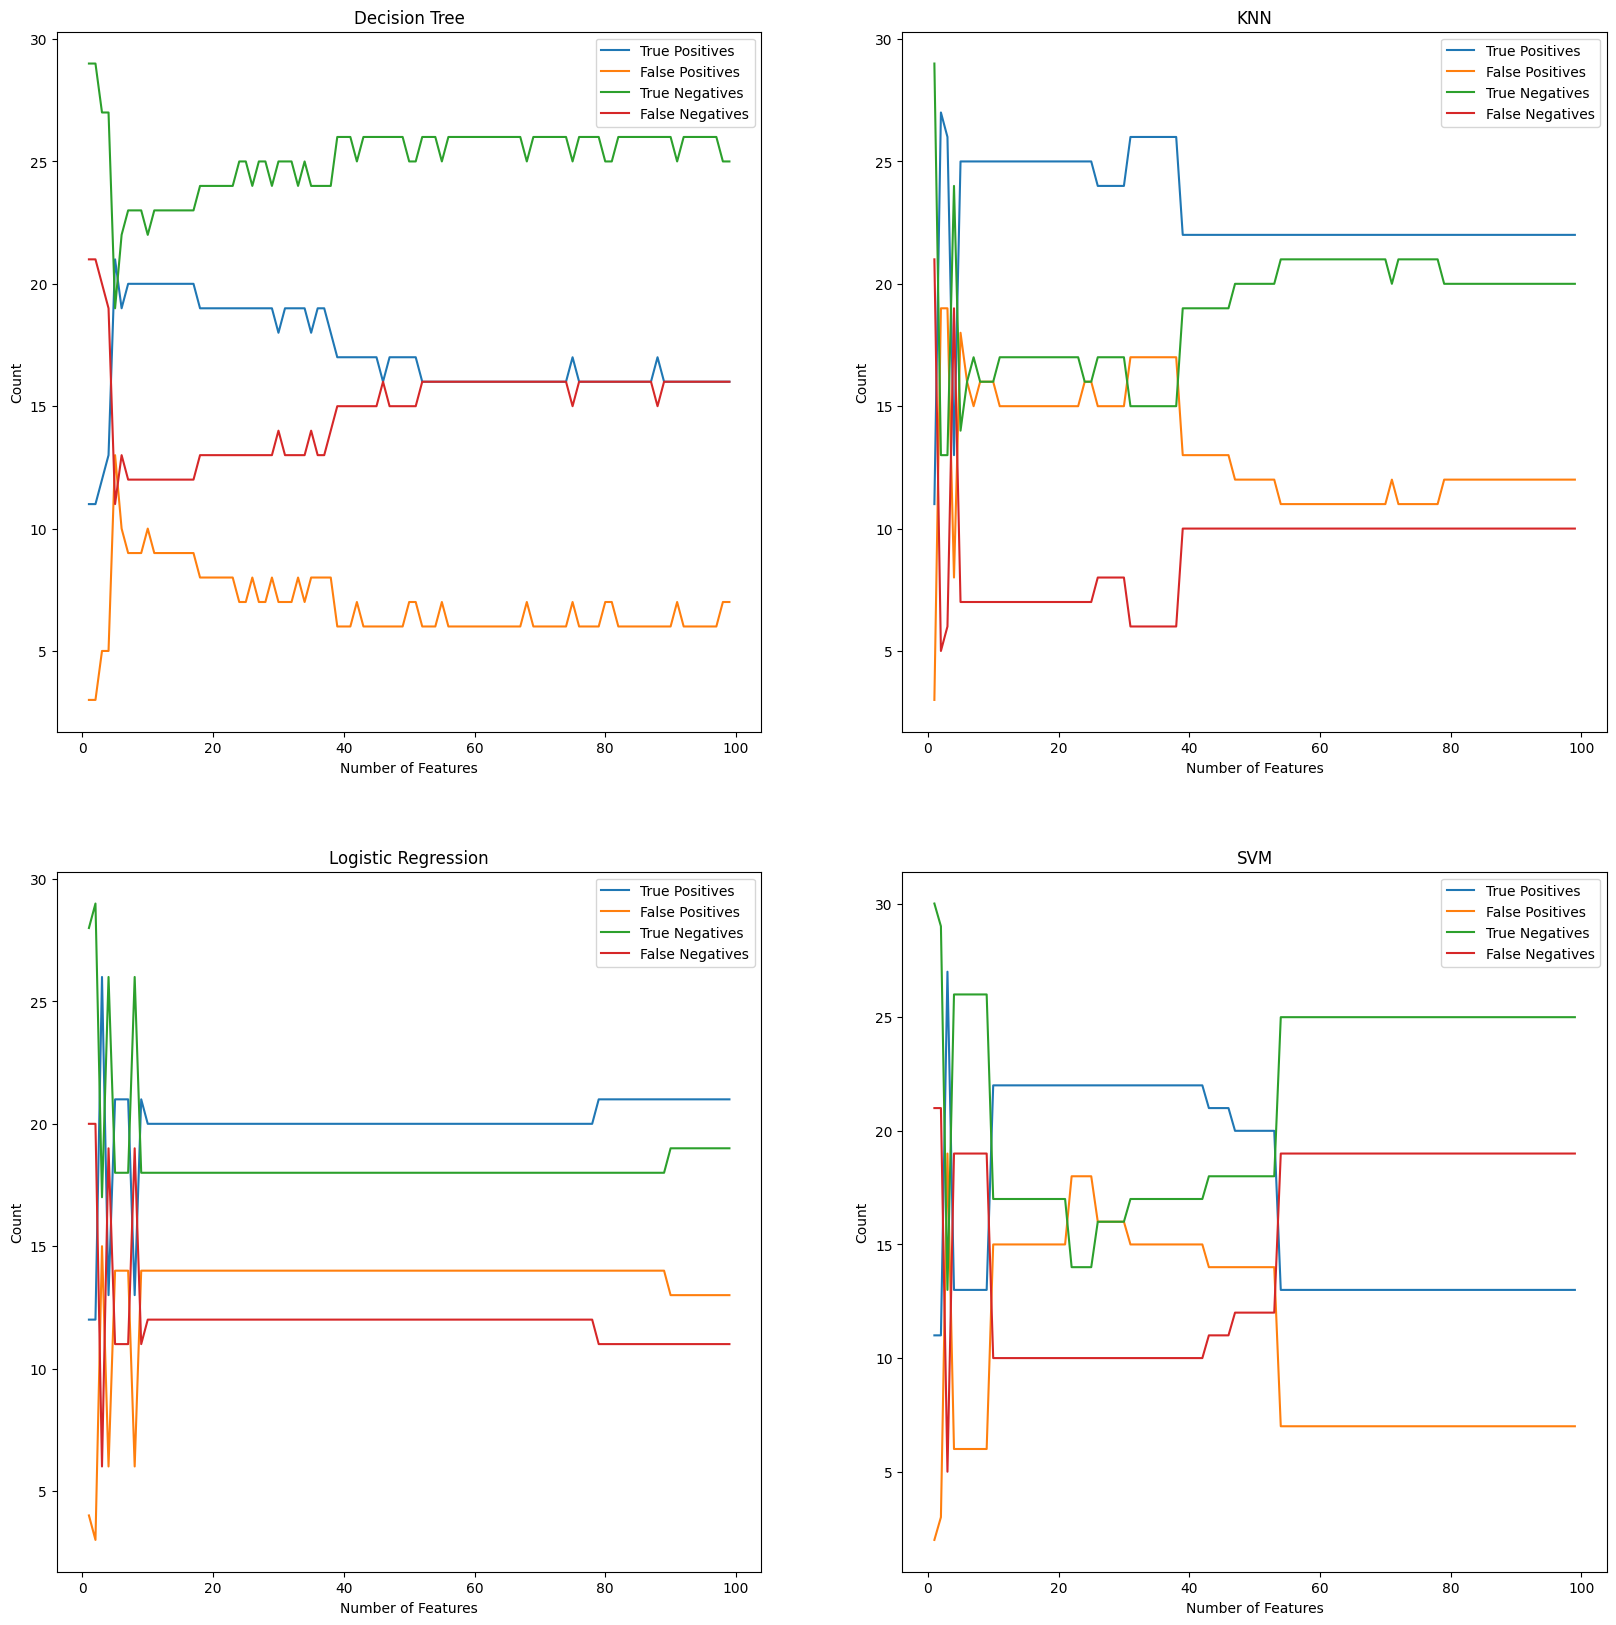

In [12]:
#{'classifier': 'svm', 'n_features': 1, 'tp': 11, 'fp': 2, 'tn': 30, 'fn': 21}


# plot for each classifier the number of features vs the number of true positives, false positives, true negatives, and false negatives
# for each classifier, plot the number of features vs the accuracy, precision, recall, and f1 score

# Decision Tree
decision_tree_df = pd.DataFrame(decision_tree)
decision_tree_df = decision_tree_df.groupby("n_features").sum()
decision_tree_df["tpr"] = decision_tree_df["tp"] / (decision_tree_df["tp"] + decision_tree_df["fn"])
decision_tree_df["fpr"] = decision_tree_df["fp"] / (decision_tree_df["fp"] + decision_tree_df["tn"])
decision_tree_df["accuracy"] = (decision_tree_df["tp"] + decision_tree_df["tn"]) / (decision_tree_df["tp"] + decision_tree_df["fp"] + decision_tree_df["tn"] + decision_tree_df["fn"])
decision_tree_df["precision"] = decision_tree_df["tp"] / (decision_tree_df["tp"] + decision_tree_df["fp"])
decision_tree_df["recall"] = decision_tree_df["tp"] / (decision_tree_df["tp"] + decision_tree_df["fn"])
decision_tree_df["f1"] = 2 * (decision_tree_df["precision"] * decision_tree_df["recall"]) / (decision_tree_df["precision"] + decision_tree_df["recall"])

# KNN
knn_df = pd.DataFrame(knn)
knn_df = knn_df.groupby("n_features").sum()
knn_df["tpr"] = knn_df["tp"] / (knn_df["tp"] + knn_df["fn"])
knn_df["fpr"] = knn_df["fp"] / (knn_df["fp"] + knn_df["tn"])
knn_df["accuracy"] = (knn_df["tp"] + knn_df["tn"]) / (knn_df["tp"] + knn_df["fp"] + knn_df["tn"] + knn_df["fn"])
knn_df["precision"] = knn_df["tp"] / (knn_df["tp"] + knn_df["fp"])
knn_df["recall"] = knn_df["tp"] / (knn_df["tp"] + knn_df["fn"])
knn_df["f1"] = 2 * (knn_df["precision"] * knn_df["recall"]) / (knn_df["precision"] + knn_df["recall"])

# Logistic Regression
logistic_regression_df = pd.DataFrame(logistic_regression)
logistic_regression_df = logistic_regression_df.groupby("n_features").sum()
logistic_regression_df["tpr"] = logistic_regression_df["tp"] / (logistic_regression_df["tp"] + logistic_regression_df["fn"])
logistic_regression_df["fpr"] = logistic_regression_df["fp"] / (logistic_regression_df["fp"] + logistic_regression_df["tn"])
logistic_regression_df["accuracy"] = (logistic_regression_df["tp"] + logistic_regression_df["tn"]) / (logistic_regression_df["tp"] + logistic_regression_df["fp"] + logistic_regression_df["tn"] + logistic_regression_df["fn"])
logistic_regression_df["precision"] = logistic_regression_df["tp"] / (logistic_regression_df["tp"] + logistic_regression_df["fp"])
logistic_regression_df["recall"] = logistic_regression_df["tp"] / (logistic_regression_df["tp"] + logistic_regression_df["fn"])
logistic_regression_df["f1"] = 2 * (logistic_regression_df["precision"] * logistic_regression_df["recall"]) / (logistic_regression_df["precision"] + logistic_regression_df["recall"])


# SVM
svm_df = pd.DataFrame(svm)
svm_df = svm_df.groupby("n_features").sum()
svm_df["tpr"] = svm_df["tp"] / (svm_df["tp"] + svm_df["fn"])
svm_df["fpr"] = svm_df["fp"] / (svm_df["fp"] + svm_df["tn"])
svm_df["accuracy"] = (svm_df["tp"] + svm_df["tn"]) / (svm_df["tp"] + svm_df["fp"] + svm_df["tn"] + svm_df["fn"])
svm_df["precision"] = svm_df["tp"] / (svm_df["tp"] + svm_df["fp"])
svm_df["recall"] = svm_df["tp"] / (svm_df["tp"] + svm_df["fn"])
svm_df["f1"] = 2 * (svm_df["precision"] * svm_df["recall"]) / (svm_df["precision"] + svm_df["recall"])

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(20, 20))

ax[0, 0].plot(decision_tree_df.index, decision_tree_df["tp"], label="True Positives")
ax[0, 0].plot(decision_tree_df.index, decision_tree_df["fp"], label="False Positives")
ax[0, 0].plot(decision_tree_df.index, decision_tree_df["tn"], label="True Negatives")
ax[0, 0].plot(decision_tree_df.index, decision_tree_df["fn"], label="False Negatives")
ax[0, 0].set_title("Decision Tree")

ax[0, 1].plot(knn_df.index, knn_df["tp"], label="True Positives")
ax[0, 1].plot(knn_df.index, knn_df["fp"], label="False Positives")
ax[0, 1].plot(knn_df.index, knn_df["tn"], label="True Negatives")
ax[0, 1].plot(knn_df.index, knn_df["fn"], label="False Negatives")
ax[0, 1].set_title("KNN")

ax[1, 0].plot(logistic_regression_df.index, logistic_regression_df["tp"], label="True Positives")
ax[1, 0].plot(logistic_regression_df.index, logistic_regression_df["fp"], label="False Positives")
ax[1, 0].plot(logistic_regression_df.index, logistic_regression_df["tn"], label="True Negatives")
ax[1, 0].plot(logistic_regression_df.index, logistic_regression_df["fn"], label="False Negatives")
ax[1, 0].set_title("Logistic Regression")

ax[1, 1].plot(svm_df.index, svm_df["tp"], label="True Positives")
ax[1, 1].plot(svm_df.index, svm_df["fp"], label="False Positives")
ax[1, 1].plot(svm_df.index, svm_df["tn"], label="True Negatives")
ax[1, 1].plot(svm_df.index, svm_df["fn"], label="False Negatives")
ax[1, 1].set_title("SVM")

for i in range(2):
    for j in range(2):
        ax[i, j].legend()
        ax[i, j].set_xlabel("Number of Features")
        ax[i, j].set_ylabel("Count")


plt.show()


In [15]:
decision_tree_df

,classifier,tp,fp,tn,fn,y_pred,y_test,tpr,fpr,accuracy,precision,recall,f1
n_features,,,,,,,,,,,,,
1,decision_tree,11,3,29,21,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, ...","[1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, ...",0.34375,0.09375,0.625000,0.785714,0.34375,0.478261
2,decision_tree,11,3,29,21,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, ...","[1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, ...",0.34375,0.09375,0.625000,0.785714,0.34375,0.478261
3,decision_tree,12,5,27,20,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, ...","[1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, ...",0.37500,0.15625,0.609375,0.705882,0.37500,0.489796
4,decision_tree,13,5,27,19,"[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, ...","[1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, ...",0.40625,0.15625,0.625000,0.722222,0.40625,0.520000
5,decision_tree,21,13,19,11,"[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, ...","[1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, ...",0.65625,0.40625,0.625000,0.617647,0.65625,0.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,decision_tree,16,6,26,16,"[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, ...","[1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, ...",0.50000,0.18750,0.656250,0.727273,0.50000,0.592593
96,decision_tree,16,6,26,16,"[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, ...","[1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, ...",0.50000,0.18750,0.656250,0.727273,0.50000,0.592593
97,decision_tree,16,6,26,16,"[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, ...","[1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, ...",0.50000,0.18750,0.656250,0.727273,0.50000,0.592593


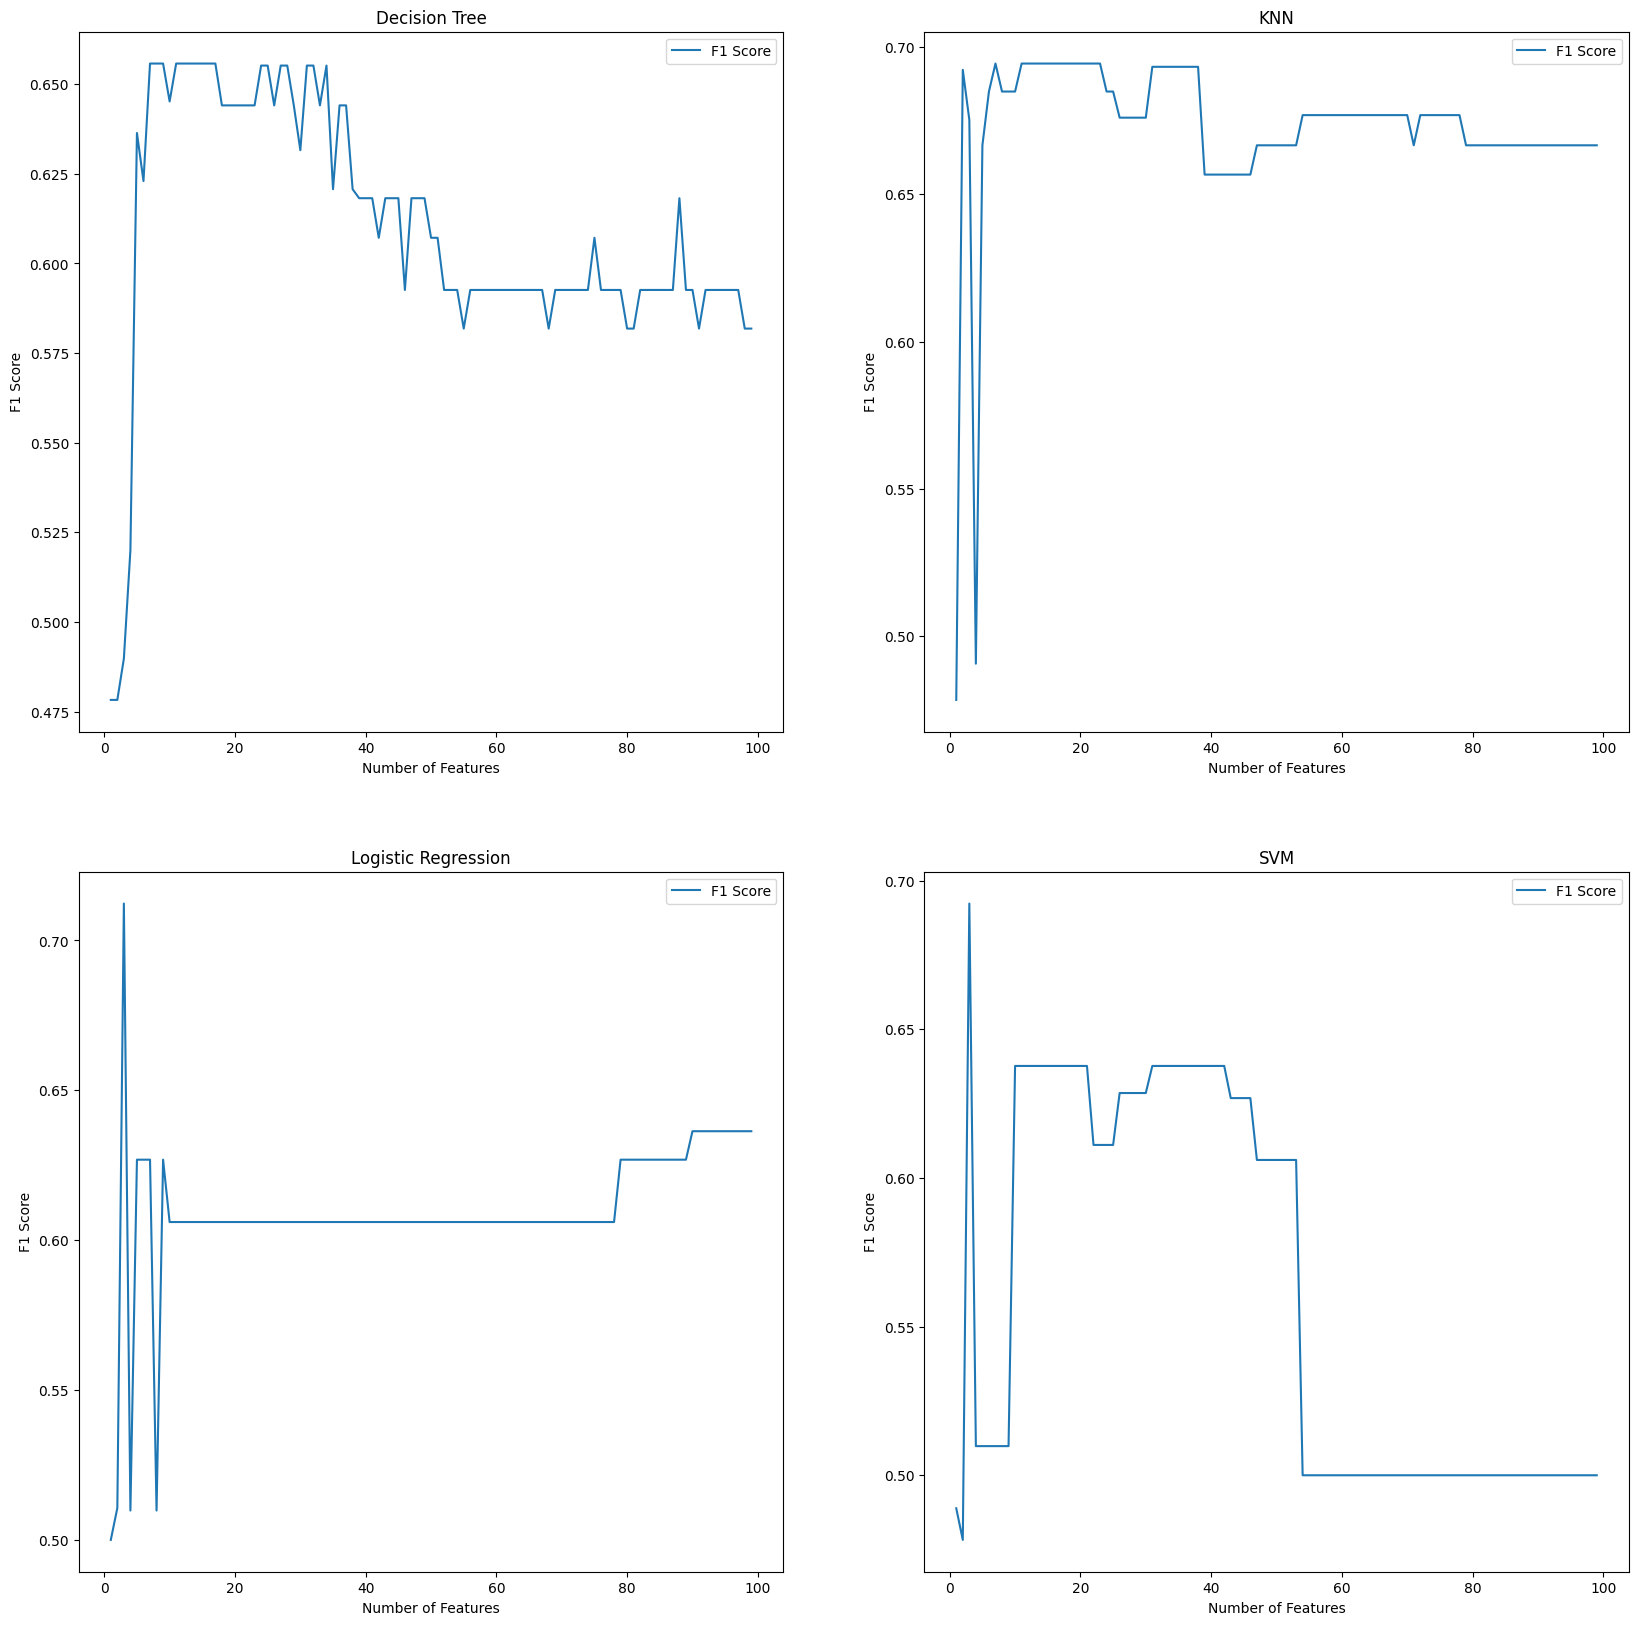

In [20]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(20, 20))

ax[0, 0].plot(decision_tree_df.index, decision_tree_df["f1"], label="F1 Score")
ax[0, 0].set_title("Decision Tree")

ax[0, 1].plot(knn_df.index, knn_df["f1"], label="F1 Score")
ax[0, 1].set_title("KNN")

ax[1, 0].plot(logistic_regression_df.index, logistic_regression_df["f1"], label="F1 Score")
ax[1, 0].set_title("Logistic Regression")

ax[1, 1].plot(svm_df.index, svm_df["f1"], label="F1 Score")
ax[1, 1].set_title("SVM")

for i in range(2):
    for j in range(2):
        ax[i, j].legend()
        ax[i, j].set_xlabel("Number of Features")
        ax[i, j].set_ylabel("F1 Score")


plt.show()
